In [ ]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Loading the CIFAR-10 dataset

 (train_data, train_label), (test_data, test_label) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Print the shape of training and testing data to verify

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print(train_label[0])

[6]


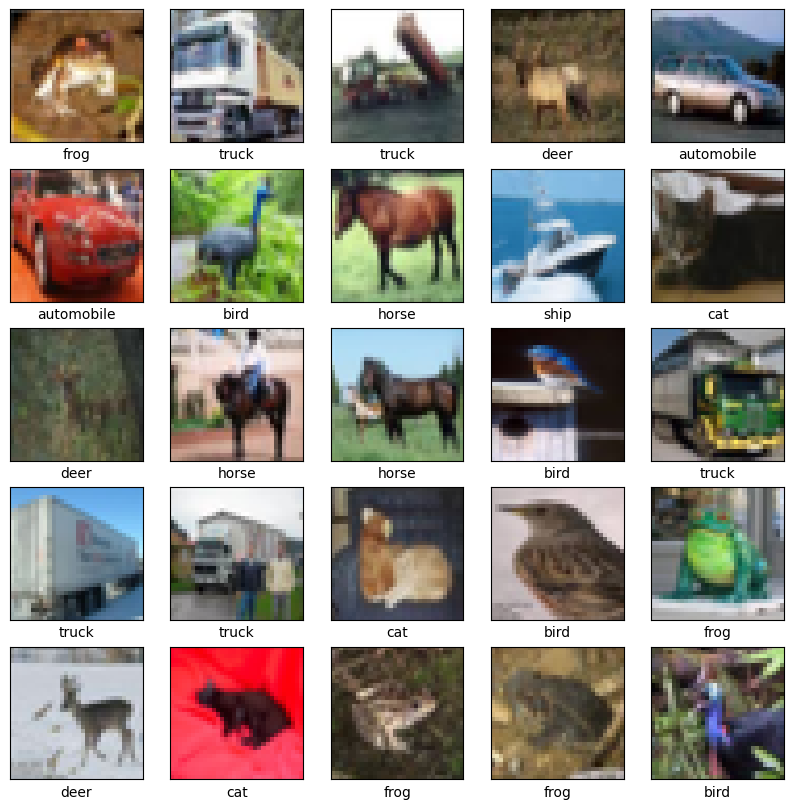

In [ ]:
# Defining class names for CIFAR-10 dataset

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting the first 25 images in the training dataset


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    # train_label[i] is an array, even if it has one element.
    # Extract the integer value for indexing into class_names.
    plt.xlabel(class_names[train_label[i][0]])
plt.show()

In [ ]:
# Preprocessing the data


trainX = train_data.reshape(train_data.shape[0], 32, 32, 3).astype('float32') / 255  # Keep original image dimensions (32x32x3)
trainY = to_categorical(train_label)
testX = test_data.reshape(test_data.shape[0], 32, 32, 3).astype('float32') / 255  # Keep original image dimensions (32x32x3)
testY = to_categorical(test_label)

In [ ]:
# Building the CNN model


model=Sequential()

# First convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and input shape (32, 32, 3)

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
# First max pooling layer with 2x2 pool size

model.add(MaxPooling2D((2,2)))

# Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation


model.add(Conv2D(64, (3,3), activation='relu'))

# Second max pooling layer with 2x2 pool size

model.add(MaxPooling2D((2,2)))
# Flattening the 3D output to 1D for the fully connected layers

model.add(Flatten())

# Fully connected layer with 64 neurons and ReLU activation

model.add(Dense(64,activation='relu'))

# Output layer with 10 neurons (one for each class) and softmax activation

model.add(Dense(10,activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model with Adam optimizer and categorical cross-entropy loss function

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Evaluating the model on the test data before training

from re import VERBOSE
test_loss,test_acc=model.evaluate(testX,testY,verbose=2)
print(test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.0894 - loss: 2.3073
0.08940000087022781


In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Training the model with the training data for 5 epochs, batch size of 64, and 10% validation split

history=model.fit(trainX,trainY,epochs=5,batch_size=64,validation_split=0.1)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 79ms/step - accuracy: 0.3705 - loss: 1.7475 - val_accuracy: 0.5570 - val_loss: 1.2472
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.5761 - loss: 1.1977 - val_accuracy: 0.6160 - val_loss: 1.0949
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6321 - loss: 1.0504 - val_accuracy: 0.6316 - val_loss: 1.0473
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.6678 - loss: 0.9565 - val_accuracy: 0.6722 - val_loss: 0.9407
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.6874 - loss: 0.8905 - val_accuracy: 0.6824 - val_loss: 0.9313


313/313 - 4s - 13ms/step - accuracy: 0.6751 - loss: 0.9510
0.6751000285148621
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


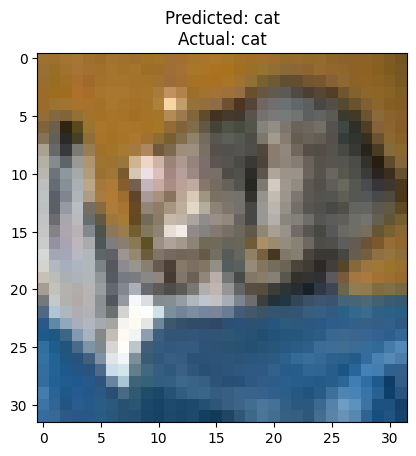

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


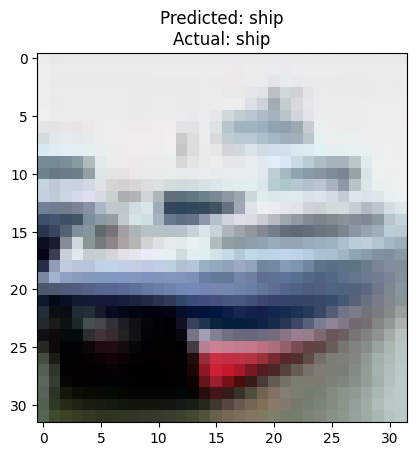

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


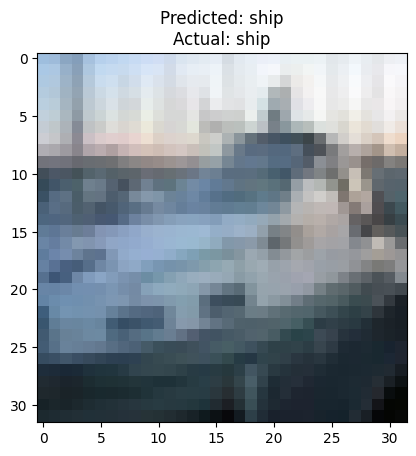

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


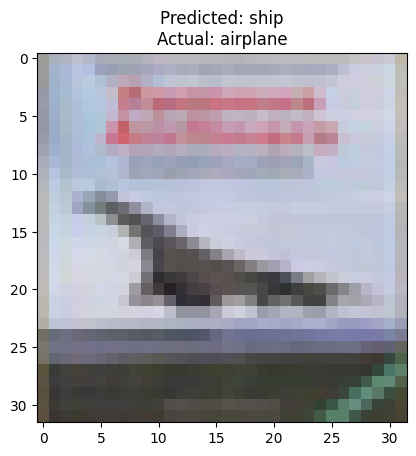

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


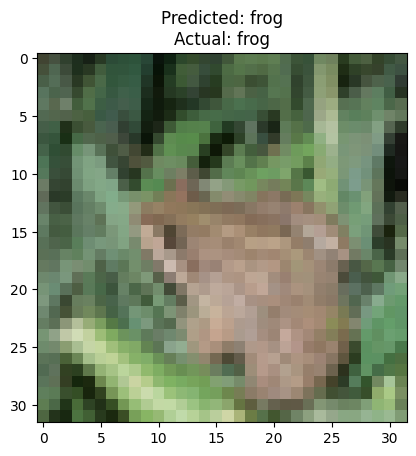

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


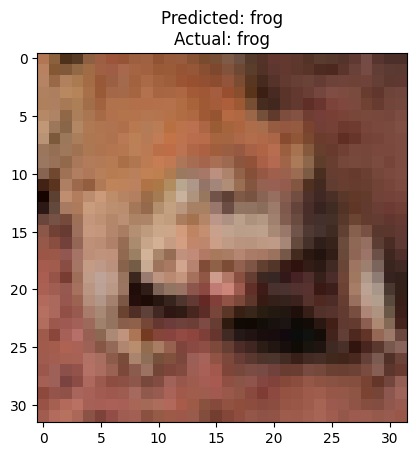

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


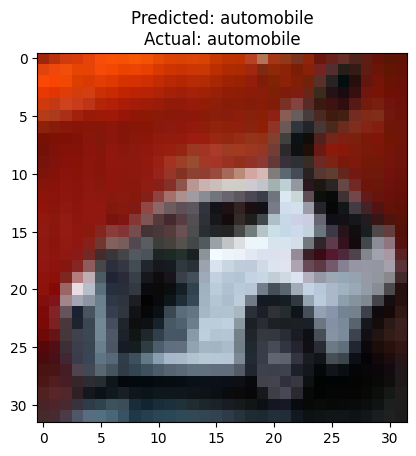

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


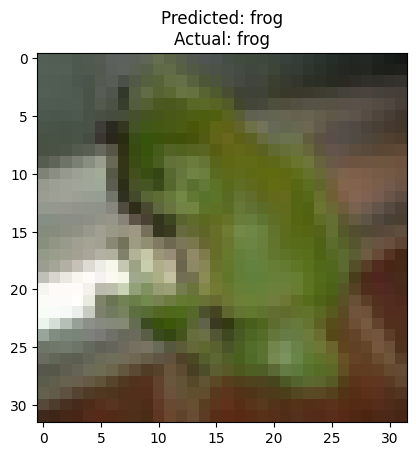

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


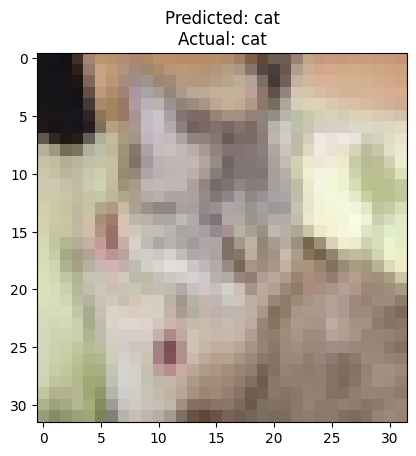

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


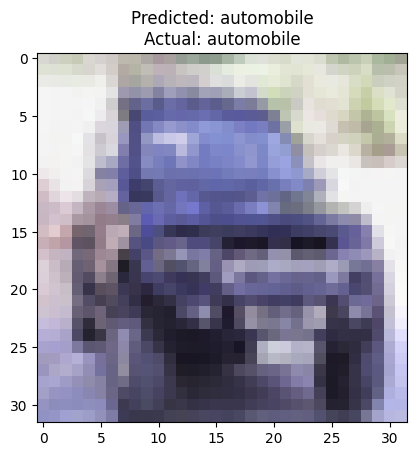

In [ ]:
from re import VERBOSE
test_loss,test_acc=model.evaluate(testX,testY,verbose=2)
print(test_acc)


y_test_lebels=testY.argmax(axis=1)

# Function to predict and visualize the results on a given image


def predict_and_visualize(model, testX, testY, index):
    image = testX[index].reshape(32, 32,3)
    label = testY[index]
    #Predict the class
    prediction = model.predict(testX[index:index+1])
    predicted_label= np.argmax(prediction)

    #Display and image
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[np.argmax(label)]}")
    plt.show()

# Predict and visualize results for 10 random images from the test set


for i in range(10):
  predict_and_visualize(model, testX, testY, i)